# **Importing dataframe**

Importing Dataframe as df_sharks, displaying all columns

In [144]:
import pandas as pd
df_sharks=pd.read_excel("GSAF5.xls")
pd.options.display.max_columns = None
df_sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,13 Oct-223,2023.0,Questionable,USA,California,"Linda Mar, Pacific State Beach, San Mateo County",Surfing,male,M,52,Minor linjury to left lower leg,NaN,15h45,NaN,CBS News. 10/13/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02 Oct-2023,2023.0,Unprovoked,USA,Hawaii,"Paia, Maui",Surfing,K. Cole,F,45,Minor injury. Shark bit surfboard,N,13h00,NaN,"The Beat of Hawaii, 10/2/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01 Oct-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Beachport,Swimming,Pamela Cook,F,64,Bite to foot and leg,N,07h45,NaN,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01 Oct-2023,2023.0,Unprovoked,USA,California,"Wildcat Beach, Marin County",Swimming,Felix Louis N'Jai,M,52,Body not recovered,Y,10h40,NaN,"SF Chronicle, 10/10/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 Sep-2023,2023.0,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",Swimming,male,M,NaN,Non-lifethreatening injuries,N,16h00,NaN,"C. Creswell, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df_sharks["Activity"].value_counts()

Surfing                                   1113
Swimming                                   966
Fishing                                    483
Spearfishing                               379
Wading                                     173
                                          ... 
Swimming alongside yacht Mexico Fiesta       1
Fishing for red fish                         1
Fishing boat swamped in a storm              1
Free diving (but on surface)                 1
Wreck of  large double sailing canoe         1
Name: Activity, Length: 1585, dtype: int64

# Dataframe initial stats

Checking dataframe shape

In [146]:
print(f"Initial dataframe has {df_sharks.shape[0]} rows")
print(f"Initial dataframe has {df_sharks.shape[1]} columns")

Initial dataframe has 6930 rows
Initial dataframe has 23 columns


By running info() and nunique() methods on the dataframe below, we can conclude that:
-  handling of null values is required for columns Unnamed: 21 and Unnamed: 22
-  rows have to be checked for complete duplicates
<br>
<br>
Further data cleaning will be defined when we go into business case specifications below.

In [147]:
df_sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6905 non-null   object 
 1   Year            6903 non-null   float64
 2   Type            6887 non-null   object 
 3   Country         6855 non-null   object 
 4   State           6424 non-null   object 
 5   Location        6341 non-null   object 
 6   Activity        6321 non-null   object 
 7   Name            6686 non-null   object 
 8   Sex             6326 non-null   object 
 9   Age             3919 non-null   object 
 10  Injury          6870 non-null   object 
 11  Unnamed: 11     6343 non-null   object 
 12  Time            3387 non-null   object 
 13  Species         3785 non-null   object 
 14  Source          6886 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

In [148]:
df_sharks.nunique()

Date              5966
Year               257
Type                11
Country            223
State              892
Location          4482
Activity          1585
Name              5657
Sex                  8
Age                243
Injury            4063
Unnamed: 11         12
Time               408
Species           1665
Source            5270
pdf               6789
href formula      6785
href              6776
Case Number       6777
Case Number.1     6775
original order    6797
Unnamed: 21          1
Unnamed: 22          2
dtype: int64

### Handling null values

In [149]:
df_sharks.isnull().sum()

Date                25
Year                27
Type                43
Country             75
State              506
Location           589
Activity           609
Name               244
Sex                604
Age               3011
Injury              60
Unnamed: 11        587
Time              3543
Species           3145
Source              44
pdf                131
href formula       111
href               134
Case Number        132
Case Number.1      133
original order     131
Unnamed: 21       6929
Unnamed: 22       6928
dtype: int64

Looks like columns Unnamed 21 and Unnamed 22 are dummies - 3 values filled in both columns out of 12k+ data points
<br>
Using non-inplace dropna method to view non-null values in Unnamed 21 and 22 columns to check whether we need that data


In [150]:
df_sharks["Unnamed: 21"].dropna()

2065    stopped here
Name: Unnamed: 21, dtype: object

In [151]:
df_sharks["Unnamed: 22"].dropna()

5009             Teramo
6437    change filename
Name: Unnamed: 22, dtype: object

Dummy columns confirmed, values are irrelevant, so we can proceed with deleting both series from the dataframe


In [152]:
df_sharks.drop(columns=["Unnamed: 22","Unnamed: 21"],axis=1,inplace=True)

In [153]:
df_sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,13 Oct-223,2023.0,Questionable,USA,California,"Linda Mar, Pacific State Beach, San Mateo County",Surfing,male,M,52,Minor linjury to left lower leg,NaN,15h45,NaN,CBS News. 10/13/2023,NaN,NaN,NaN,NaN,NaN,NaN
1,02 Oct-2023,2023.0,Unprovoked,USA,Hawaii,"Paia, Maui",Surfing,K. Cole,F,45,Minor injury. Shark bit surfboard,N,13h00,NaN,"The Beat of Hawaii, 10/2/2023",NaN,NaN,NaN,NaN,NaN,NaN
2,01 Oct-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Beachport,Swimming,Pamela Cook,F,64,Bite to foot and leg,N,07h45,NaN,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN
3,01 Oct-2023,2023.0,Unprovoked,USA,California,"Wildcat Beach, Marin County",Swimming,Felix Louis N'Jai,M,52,Body not recovered,Y,10h40,NaN,"SF Chronicle, 10/10/2023",NaN,NaN,NaN,NaN,NaN,NaN
4,18 Sep-2023,2023.0,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",Swimming,male,M,NaN,Non-lifethreatening injuries,N,16h00,NaN,"C. Creswell, GSAF",NaN,NaN,NaN,NaN,NaN,NaN


### Handling duplicates

In [154]:
df_sharks.isnull().sum(axis=1)

0        8
1        7
2        7
3        7
4        8
        ..
6925    20
6926    20
6927    20
6928    20
6929    20
Length: 6930, dtype: int64

Checking values with nulls in rows - useful data points or can we delete them?

In [155]:
null_rows=df_sharks.isnull().sum(axis=1)
null_indexes=null_rows[null_rows>=20].index #played with the limitor number here - suspicious number turned out to be 20

display(df_sharks.loc[null_indexes])
#saving this as temp dataframe to run checks later
df_null_rows=pd.DataFrame(df_sharks.loc[null_indexes])

print("Suspicious empty rows:",len(list(df_sharks.loc[null_indexes].index)),"rows")

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
6905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN
6906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN
6907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN
6908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN
6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN
6910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN
6911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN
6912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN
6913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN
6914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN


Suspicious empty rows: 25 rows


All values in those 25 rows except for href column are null. 
<br>
Checking if these rows are complete duplicates. Then, checking unqiue values in href - is it the same link across dataset?
<br>
If both conditions are true - 25 rows as above can be dropped

In [156]:
df_null_rows.duplicated().sum()

24

In [157]:
df_sharks["href formula"].value_counts()

http://sharkattackfile.net/spreadsheets/pdf_directory/                                       25
http://sharkattackfile.net/spreadsheets/pdf_directory/1906.09.27.R.a&b-Munich-Swede.pdf       2
http://sharkattackfile.net/spreadsheets/pdf_directory/1916.12.08.a-b-German.pdf               2
http://sharkattackfile.net/spreadsheets/pdf_directory/1929.03.04.a-b.Roads-Aldridge.pdf       2
http://sharkattackfile.net/spreadsheets/pdf_directory/1916.07.12.a-b-Stillwell-Fisher.pdf     2
                                                                                             ..
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.04.15-Venezuela.pdf                1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.04.18-PatrickAFB.pdf               1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.04.19-SD.pdf                       1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.04.20.a-StephenFlowers.pdf         1
http://sharkattackfile.net/spreadsheets/

All 25 rows are complete duplicates, and the link in href formula is a dummy.
<br>
Complete dummy rows that carry no vital data points- can be deleted

In [158]:
df_sharks.drop(index=list(df_sharks.loc[null_indexes].index),axis=0,inplace=True) 

Resetting Indexes before carrying out further transformations

In [159]:
df_sharks.reset_index(drop=True,inplace=True)

In [160]:
df_sharks.shape #checking that all structure changes have been saved

(6905, 21)

# Business Case Specification

Our business case scenario is considering a purchase of a Water Fun park in Cadiz, Spain.
<br>
<br>
**Hypotheses:**
*  Spain is one of the least common locations for shark attacks -> test country and location.
*  Water fun platforms are not an activity which attracts sharks -> test activity.
*  Victims of shark attacks are primarily adults (our primary customer is children) -> test age brackets.
<br>
<br>
We will not need to look at all of the data within the provided dataframe.
<br>
Unused data that does not add to the parameters tested above can be dropped.

### Dropping columns irrelevant to the business case

In [161]:
df_sharks.drop(columns=df_sharks.loc[:, 'Source':'original order'], inplace=True)

In [162]:
df_sharks.drop(columns="Unnamed: 11", inplace=True)
df_sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species
0,13 Oct-223,2023.0,Questionable,USA,California,"Linda Mar, Pacific State Beach, San Mateo County",Surfing,male,M,52,Minor linjury to left lower leg,15h45,NaN
1,02 Oct-2023,2023.0,Unprovoked,USA,Hawaii,"Paia, Maui",Surfing,K. Cole,F,45,Minor injury. Shark bit surfboard,13h00,NaN
2,01 Oct-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Beachport,Swimming,Pamela Cook,F,64,Bite to foot and leg,07h45,NaN
3,01 Oct-2023,2023.0,Unprovoked,USA,California,"Wildcat Beach, Marin County",Swimming,Felix Louis N'Jai,M,52,Body not recovered,10h40,NaN
4,18 Sep-2023,2023.0,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",Swimming,male,M,NaN,Non-lifethreatening injuries,16h00,NaN


### Dropping rows irrelevant to the business case (filter on Type)

Because we are looking at a water park business case, we need to filter out certain types of accidents.
<br>
<br>
Excluded types:
-  Provoked
-  Sea Disaster, Boat - we are presuming those refer to sunk ships with casualties, taking them out from consideration
-  Invalid - looking at data, those are mostly unconfirmed shark attacks, e.g. bit by barracuda, bit by shark post mortem
-  ? , Unconfirmed, Unverified, Questionable, Under investigation - noise, can be excluded
<br>
<br>
Water platform can BROADLY be included into watercrafts, so we keep this as type, together with Unprovoked
<br>
We can DROP all other rows where Type not in ["Unprovoked","Watercraft"]

In [163]:
df_sharks["Type"].value_counts()

Unprovoked             5076
Provoked                632
Invalid                 552
Watercraft              354
Sea Disaster            242
Questionable             20
Boat                      7
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: Type, dtype: int64

In [164]:
delete_type=df_sharks[(df_sharks['Type']!="Unprovoked") & (df_sharks['Type']!="Watercraft")].index
df_sharks.drop(index=delete_type,inplace=True)
df_sharks

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species
1,02 Oct-2023,2023.0,Unprovoked,USA,Hawaii,"Paia, Maui",Surfing,K. Cole,F,45,Minor injury. Shark bit surfboard,13h00,NaN
2,01 Oct-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Beachport,Swimming,Pamela Cook,F,64,Bite to foot and leg,07h45,NaN
3,01 Oct-2023,2023.0,Unprovoked,USA,California,"Wildcat Beach, Marin County",Swimming,Felix Louis N'Jai,M,52,Body not recovered,10h40,NaN
4,18 Sep-2023,2023.0,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",Swimming,male,M,NaN,Non-lifethreatening injuries,16h00,NaN
5,13 Sep-2023,2023.0,Unprovoked,EGYPT,South Sinai,Dahab,Swimming,Zainab Ahmed Mohammed,F,34,"Left arm severely bitten, surgically amputated",NaN,Tiger shark?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,NaN,NaN
6901,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,NaN,NaN
6902,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,NaN,NaN
6903,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,NaN,NaN


### Formatting and Filtering Year

In [165]:
df_sharks["Year"].value_counts()

2015.0    123
2017.0    116
0.0       112
2016.0    110
2013.0    107
         ... 
1786.0      1
1785.0      1
1784.0      1
1780.0      1
1831.0      1
Name: Year, Length: 248, dtype: int64

112 cases of non-numeric values Year column in dataframe only represent 1.4% of all data points - can be taken out.
<br>
Furthermore, we are only interested in Spain, so let's check exclude any unstandardized year value in Spanish data from drop.

In [166]:
delete_year=df_sharks[(df_sharks["Year"]==0) & (df_sharks["Country"]!="SPAIN")].index
df_sharks.drop(index=delete_year,inplace=True)
df_sharks

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species
1,02 Oct-2023,2023.0,Unprovoked,USA,Hawaii,"Paia, Maui",Surfing,K. Cole,F,45,Minor injury. Shark bit surfboard,13h00,NaN
2,01 Oct-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Beachport,Swimming,Pamela Cook,F,64,Bite to foot and leg,07h45,NaN
3,01 Oct-2023,2023.0,Unprovoked,USA,California,"Wildcat Beach, Marin County",Swimming,Felix Louis N'Jai,M,52,Body not recovered,10h40,NaN
4,18 Sep-2023,2023.0,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",Swimming,male,M,NaN,Non-lifethreatening injuries,16h00,NaN
5,13 Sep-2023,2023.0,Unprovoked,EGYPT,South Sinai,Dahab,Swimming,Zainab Ahmed Mohammed,F,34,"Left arm severely bitten, surgically amputated",NaN,Tiger shark?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6772,Ca 1200-1500 A.D.,1500.0,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,Foot severed,NaN,NaN
6773,Ca.789-1033 A.D,1000.0,Unprovoked,USA,Puerto Rico,Archeological site,NaN,male,M,29,FATAL,NaN,Tiger shark
6774,Ca. 77 A.D.,77.0,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,NaN,FATAL,NaN,NaN
6775,Ca. 5 A.D.,5.0,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,NaN,Aboriginal rock carving depicts man being atta...,NaN,NaN


In [167]:
df_sharks[(df_sharks["Year"]==0) & (df_sharks["Country"]=="SPAIN")]

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species
6800,Before 2012,0.0,Unprovoked,SPAIN,Canary Islands,Tenerife,Skin diving,NaN,NaN,NaN,Injury required 16 stitches,NaN,NaN


In [168]:
df_sharks.loc[6800,"Year"]=2011

Converting all years to int instead of floats

In [169]:
df_sharks[df_sharks["Year"].isnull()==True]

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species
6675,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,NaN,NaN


In [170]:
df_sharks.loc[6675,"Year"]=1836

In [171]:
df_sharks["Year"]=df_sharks["Year"].dropna().apply(lambda y: int(y))

In [172]:
df_sharks["Year"]

1       2023
2       2023
3       2023
4       2023
5       2023
        ... 
6772    1500
6773    1000
6774      77
6775       5
6800    2011
Name: Year, Length: 5319, dtype: int64

# Hypothesis 1: formatting data and testing

***Spain is one of the least common locations for shark attacks.***


Using lambda function to standardize string series

In [173]:
df_sharks["Country"].dropna().apply(lambda c: str(c).strip().upper())

1             USA
2       AUSTRALIA
3             USA
4             USA
5           EGYPT
          ...    
6771       MEXICO
6772       MEXICO
6773          USA
6775    AUSTRALIA
6800        SPAIN
Name: Country, Length: 5287, dtype: object

In [174]:
df_country=pd.DataFrame(df_sharks["Country"].value_counts().head(20).reset_index())
df_country.columns=["Country","Number of Accidents"]
df_country

,Country,Number of Accidents
0,USA,2035
1,AUSTRALIA,1153
2,SOUTH AFRICA,460
3,PAPUA NEW GUINEA,114
4,NEW ZEALAND,107
5,BRAZIL,101
6,BAHAMAS,100
7,MEXICO,72
8,NEW CALEDONIA,60
9,REUNION,58


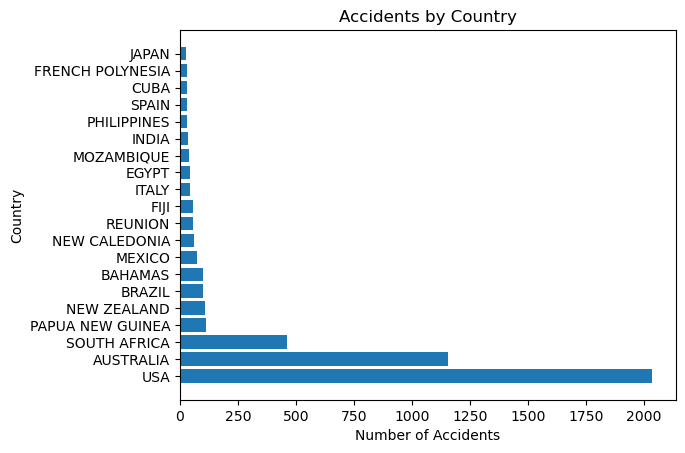

In [175]:
import matplotlib.pyplot as plt

plt.barh(df_country['Country'], df_country['Number of Accidents'])

plt.xlabel('Number of Accidents')
plt.ylabel('Country')
plt.title('Accidents by Country')

plt.show()


We can see that data has big outliers: let's confirm with standard deviation.

In [176]:
df_country.describe()

,Number of Accidents
count,20.000000
mean,231.200000
std,496.510942
min,26.000000
25%,35.000000
50%,57.500000
75%,102.500000
max,2035.000000


In [177]:
accidents_spain=df_country.loc[16, "Number of Accidents"]
accidents_mean=df_country["Number of Accidents"].mean()
accidents_max=df_country["Number of Accidents"].max()
print(f"Spain is within the historical top 20 data, with {accidents_spain} accidents over the years.")
print(f"{accidents_spain} still accounts for only {round(accidents_spain/accidents_mean*100,2)}% of mean and {round(accidents_spain/accidents_max*100,2)}% of top location of US")

Spain is within the historical top 20 data, with 31 accidents over the years.
31 still accounts for only 13.41% of mean and 1.52% of top location of US


Let's see what accidents data for Spain looks like overtime

In [178]:
df_spain=df_sharks[df_sharks["Country"]=="SPAIN"]
df_spain_year=pd.DataFrame(df_spain.groupby("Year")["Type"].count().reset_index())
df_spain_year.columns=["Year","Number of Accidents"]
df_spain_year

,Year,Number of Accidents
0,1764,1
1,1862,4
2,1864,1
3,1908,1
4,1911,1
5,1912,1
6,1916,1
7,1924,1
8,1929,1
9,1930,1


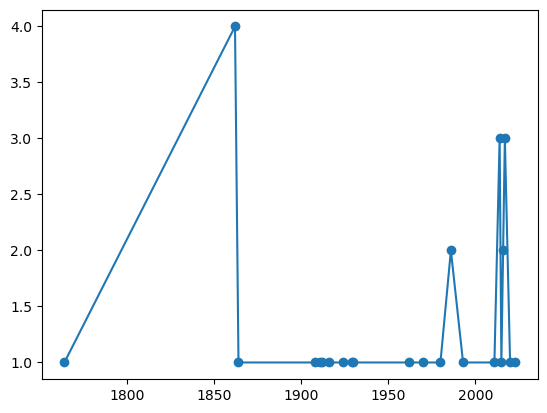

In [179]:
plt.scatter(df_spain_year["Year"],df_spain_year["Number of Accidents"])
plt.plot(df_spain_year["Year"],df_spain_year["Number of Accidents"])
plt.show()

Though number of accidents is still significantly less than in most other countries, we can see a little spike in the last 20 years.
<br>
Since we know location of our prospective business is Cadiz, we can filter out the data just to see at that location/state.
<br>
We need to standardize data first.

In [180]:
df_spain["State"] = df_spain["State"].apply(lambda c: str(c).strip().upper())
df_spain["State"].replace("CÁDIZ","CADIZ",inplace=True)
df_spain["State"].replace("GALICA","GALICIA",inplace=True)
df_spain["State"].replace("ALICANTE PROVINCE","ALICANTE",inplace=True)
df_spain["State"].replace("MÁLAGA","MALAGA",inplace=True)
df_spain["State"].replace("GRAN CANARIA","CANARY ISLANDS",inplace=True)
df_spain["State"].replace("GRAND CANARY ISLAND","CANARY ISLANDS",inplace=True)
df_spain["State"].replace("EASTERN CATALONA","CATALONIA",inplace=True)

C:\Users\mkcor\AppData\Local\Temp\ipykernel_11132\500524553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spain["State"] = df_spain["State"].apply(lambda c: str(c).strip().upper())
C:\Users\mkcor\AppData\Local\Temp\ipykernel_11132\500524553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spain["State"].replace("CÁDIZ","CADIZ",inplace=True)
C:\Users\mkcor\AppData\Local\Temp\ipykernel_11132\500524553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [181]:
df_spain_state=pd.DataFrame(df_spain.groupby("State")["Type"].count())
df_spain_state.rename(columns={"Type":"Number of Accidents"},inplace=True)
df_spain_state['State'] = df_spain_state.index
df_spain_state

,Number of Accidents,State
State,,
ALICANTE,2,ALICANTE
BALEARICS,1,BALEARICS
CADIZ,3,CADIZ
CANARY ISLANDS,10,CANARY ISLANDS
CATALONIA,4,CATALONIA
COSTA BLANCA,1,COSTA BLANCA
GALICIA,2,GALICIA
IBIZA ISLAND,1,IBIZA ISLAND
MAJORCA,1,MAJORCA


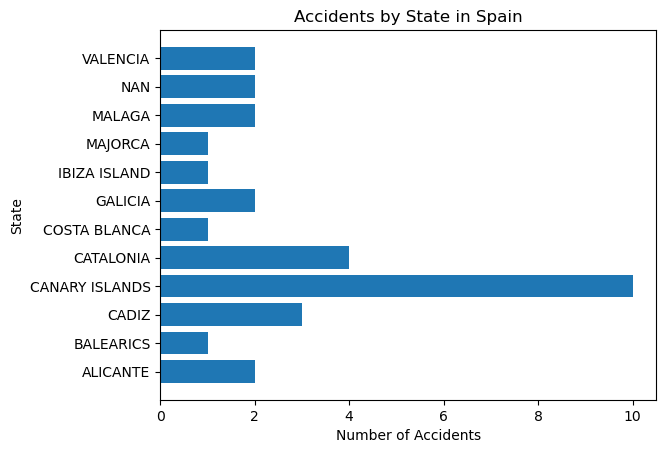

In [182]:
plt.barh(df_spain_state['State'], df_spain_state['Number of Accidents'])

plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.title('Accidents by State in Spain')

plt.show()


Canary Islands seem to be the culprit for sharks attacks historically, but let's filter this data for the past 50 years.

In [183]:
df_spain_state_recent=pd.DataFrame(df_spain[df_spain["Year"]>=1970].groupby("State")["Type"].count())
df_spain_state_recent.rename(columns={"Type":"Number of Accidents"},inplace=True)
df_spain_state_recent['State'] = df_spain_state_recent.index
df_spain_state_recent

,Number of Accidents,State
State,,
ALICANTE,2,ALICANTE
CADIZ,1,CADIZ
CANARY ISLANDS,8,CANARY ISLANDS
CATALONIA,2,CATALONIA
COSTA BLANCA,1,COSTA BLANCA
IBIZA ISLAND,1,IBIZA ISLAND
MAJORCA,1,MAJORCA
VALENCIA,1,VALENCIA


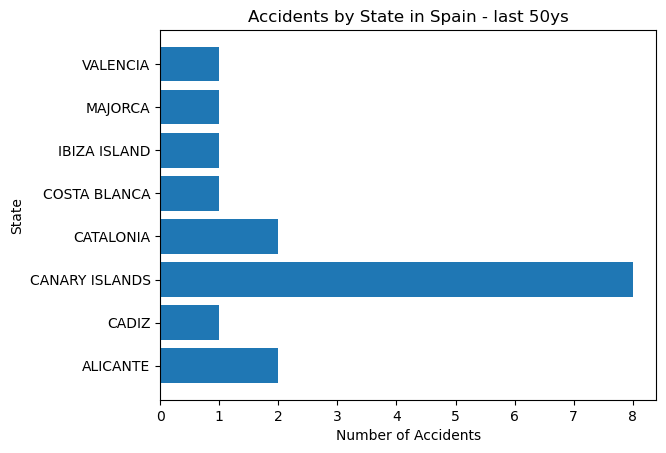

In [184]:
plt.barh(df_spain_state_recent['State'], df_spain_state_recent['Number of Accidents'])

plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.title('Accidents by State in Spain - last 50ys')

plt.show()

In [185]:
df_spain_recent=df_spain[df_spain["Year"]>=1970]
df_spain_recent

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species
16,16 Aug-2023,2023,Unprovoked,SPAIN,VALENCIA,Rabdells Beach,Wading,male,M,35,Minor lacerations to right foot,Afternoon,Blue shark
361,26 May 2020,2020,Unprovoked,SPAIN,CANARY ISLANDS,"Famara Beach, Lanzarote",Playing,male,M,9,Lacerations to both feet,NaN,Angel shark
656,16-Sep-2017,2017,Unprovoked,SPAIN,CANARY ISLANDS,Gran Canaria,Body surfing,male,M,13,Lacerations to right foot,NaN,"Porbeagle, 1.5 m"
687,23-Jul-2017,2017,Unprovoked,SPAIN,MAJORCA,"Estanys Beach, Colonia de Sant",Swimming,female,F,NaN,Abrasion to arm from shark's rough skin,Afternoon,Blue shark 6'
704,17-Jun-2017,2017,Unprovoked,SPAIN,IBIZA ISLAND,Playa d’en Bossa,Swimming,male,M,82,2-inch laceration to hand,12h00,NaN
810,29-Jul-2016,2016,Unprovoked,SPAIN,ALICANTE,Arenales del Sol,Swimming,male,M,40,Lacerations to right hand,11h30,Blue shark
825,Reported 08-Jul-2016,2016,Unprovoked,SPAIN,CANARY ISLANDS,"Las Teresitas, Tenerife",Wading,female,F,10,"5 tiny puncture marks to lower leg, treated wi...",NaN,Angel shark
898,25-Dec-2015,2015,Unprovoked,SPAIN,CANARY ISLANDS,"Arinaga Beach, Aguimes, Gran Canaria",Swimming,Cristina Ojeda-Thies,F,38,Lacerations to left forearm,NaN,"Silky shark, 6.5'"
1080,Sep-2014,2014,Unprovoked,SPAIN,CATALONIA,Salou,Playing with an air mattress,male,M,16,Lacerations to right hand,NaN,NaN
1085,27-Aug-2014,2014,Unprovoked,SPAIN,ALICANTE,Benidorm,Swimming,Raquel Martin,F,30s,Minor lacerations to posterior lower leg,NaN,small shark


In [186]:
df_spain_recent[df_spain_recent["State"]=="CADIZ"]

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species
3403,18-Mar-1986,1986,Unprovoked,SPAIN,CADIZ,Tarifa,Windsurfing,J. L Pérez-Díaz,M,NaN,Foot severed,10h55,3.5 m white shark


In [187]:
df_spain_recent[df_spain_recent["Injury"]=="FATAL"]

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species


None of the attacks are fatal and the latest Cadiz attack was in 1986
<br>
<br>
***Given the statistics above, we can rule hypothesis number 1 to be correct.***

# Hypothesis 2: formatting data and testing

***Water fun platforms are not a primary activity that attracts sharks.***


Standardizing data point through formatting and string matching

In [188]:
df_sharks["Activity"].value_counts()

Surfing                                            1050
Swimming                                            847
Spearfishing                                        295
Fishing                                             245
Wading                                              153
                                                   ... 
In waist-deep water                                   1
Free diving for abalone from Zodiac (submerged)       1
Paddle Boarding                                       1
Spearfishing                                          1
Swmming                                               1
Name: Activity, Length: 1052, dtype: int64

In [189]:
df_sharks["Activity"]=df_sharks["Activity"].apply(lambda c: str(c).strip().upper())

In [190]:
df_sharks["Activity"]=df_sharks["Activity"].dropna()

In [191]:
list(df_sharks["Activity"].unique())

['SURFING',
 'SWIMMING',
 'FISHING',
 'ON A ROUND-THE-WORLD EXPEDITION',
 'WADING',
 'KAYAK FISHING',
 'SPEARFISHING',
 'SNORKELING',
 'BOOGIE BOARDING',
 'FREEDIVING',
 'SITTING',
 'WATCHING THE SARDINE RUN',
 'STANDING',
 'FILMING',
 'SCUBA DIVING',
 'KITE SURFING',
 'DIVING FOR CRAYFISH',
 'WINDSURFING',
 'KITE-SURFING',
 'SURF-SKING',
 'DIVING WITH  SURFACE-SUPPLIED AIR',
 'DIVING',
 'SURF SKIING',
 'SHIPWRECK',
 'SWIMMING  OR SNORKELING',
 'KAYAKING',
 'PADDLEBOARDING',
 'LOBSTERING',
 'NAN',
 'LIFEGUARD TRAINING EXERCISE',
 'LIFEGUARD EXERCISES',
 'SCALLOPING',
 'JUMPED INTO WATER',
 'PLAYING IN THE WATER',
 'FIHING',
 'SURFACE SUPPLIED  DIVING',
 'FLOATING IN INFLATABLE POOL RING',
 'WING FOIL SURFING',
 'SWIMMINGQ',
 'PLAYING',
 'FISHING, FELL IN WATER',
 'SQUATTING IN THE WATER',
 'CANOEING',
 'PARASAILING',
 'KITE FOILING',
 'BOGGIE BOARDING',
 'STAND UP PADDLEBOARDING',
 'BODY BOARDING',
 'BODY SURFING',
 'PADDLE BOARDING',
 'SWIMMING / KAYAKING',
 'FELL OFF FISHING BOAT',
 

The most common activities seem to include:
-  Swimming
-  Fishing
-  Surfing
-  Wading
-  Boat
-  Diving (include snorkeling)
-  Boarding (paddle, boggie,paddling)

Writing a function to see if cases can be categorised better.

In [192]:
def activity(activity):
    if ("SWIM" in activity) or ("SWM" in activity) or ("BATHING" in activity):
        return "SWIMMING"
    elif "SURF" in activity:
        return "SURFING"
    elif "WADING" in activity:
        return "WADING"
    elif "FISH" in activity:
        return "FISHING"
    elif ("DIVING" in activity) or ("SNORKELING" in activity) or ("DIVE" in activity) or ("SCUBA" in activity):
        return "DIVING"
    elif ("BOAT" in activity) or ("SHIP" in activity) or ("OVERBOARD" in activity) or ("SAIL" in activity) or ("VESSLE" in activity):
        return "BOAT" 
    elif ("PADDLE" in activity) or ("PADDLING" in activity) or ("BODY BOARD" in activity) or ("FLOAT" in activity):
        return "PADDLING"   
    else:
        return activity

df_sharks["Activity"] = df_sharks["Activity"].apply(activity)

In [193]:
df_sharks["Activity"].value_counts()

SURFING                                                         1317
SWIMMING                                                        1235
FISHING                                                          801
DIVING                                                           532
NAN                                                              386
                                                                ... 
CATCHING SARDINES                                                  1
EXERCISING HIS DOG IN THE SHALLOWS                                 1
MURDERED BY THAI PIRATES                                           1
THRASHING THE WATER / IMITATING THE SHARK VICTIM FROM "JAWS"       1
WASHING HIMSELF                                                    1
Name: Activity, Length: 247, dtype: int64

Not that activity data is much more standardized, we can look at the breakdown
<br>
Water Fun BROADLY falls into Wading and Paddling -- done on floating plaforms in shallow waters

In [194]:
cases=df_sharks[(df_sharks["Activity"]=="WADING") | (df_sharks["Activity"]=="PADDLING")].shape[0]
print (f"Historically, only {cases} accidents could be attributed to similar acitivity, out of {df_sharks.shape[0]}")

Historically, only 322 accidents could be attributed to similar acitivity, out of 5319


***Given the statistics above, we can rule hypothesis number 2 to be correct.***


# Hypothesis 3: formatting data and testing

***Adults are attacked more frequently than children.***


Since our target audience is children, but initial data in the dataframe is too noisy, we can use categories:
-  Below 12yo - Child
-  Between 13-17yo - Teenager
-  Older than 18yo - Adult

In [195]:
import numpy as np
import re

def age_brackets(age):
    if re.match(r'^\d+$', str(age)):
        age = int(age)
        if age <= 12:
            return 'Child'
        elif age < 18:
            return 'Teenager'
        else:
            return 'Adult'
    return np.nan  
#adding new column to existing dataframe with age category and dropping non-numeric rows
df_sharks['Age Group'] = df_sharks['Age'].apply(age_brackets)
df_sharks.dropna(subset=['Age Group'], inplace=True)

In [196]:
age=pd.Series(df_sharks["Age Group"].value_counts())
age

Adult       2273
Teenager     623
Child        280
Name: Age Group, dtype: int64

<Axes: ylabel='Age Group'>

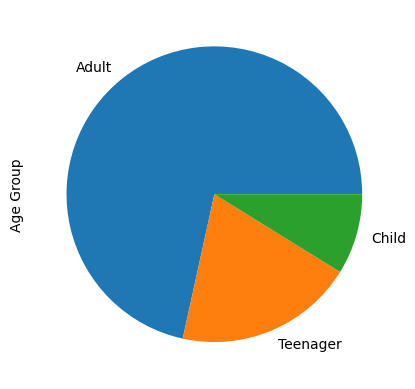

In [197]:
age.plot.pie()

Hypothesis confirmed on the worldwide scale, but let's see Spanish data overtime just to confirm on our business case

In [198]:
df_spain['Age Group']= df_spain['Age'].apply(age_brackets)

C:\Users\mkcor\AppData\Local\Temp\ipykernel_11132\2923357025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spain['Age Group']= df_spain['Age'].apply(age_brackets)


In [199]:
df_spain

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Age Group
16,16 Aug-2023,2023,Unprovoked,SPAIN,VALENCIA,Rabdells Beach,Wading,male,M,35,Minor lacerations to right foot,Afternoon,Blue shark,Adult
361,26 May 2020,2020,Unprovoked,SPAIN,CANARY ISLANDS,"Famara Beach, Lanzarote",Playing,male,M,9,Lacerations to both feet,NaN,Angel shark,Child
656,16-Sep-2017,2017,Unprovoked,SPAIN,CANARY ISLANDS,Gran Canaria,Body surfing,male,M,13,Lacerations to right foot,NaN,"Porbeagle, 1.5 m",Teenager
687,23-Jul-2017,2017,Unprovoked,SPAIN,MAJORCA,"Estanys Beach, Colonia de Sant",Swimming,female,F,NaN,Abrasion to arm from shark's rough skin,Afternoon,Blue shark 6',NaN
704,17-Jun-2017,2017,Unprovoked,SPAIN,IBIZA ISLAND,Playa d’en Bossa,Swimming,male,M,82,2-inch laceration to hand,12h00,NaN,Adult
810,29-Jul-2016,2016,Unprovoked,SPAIN,ALICANTE,Arenales del Sol,Swimming,male,M,40,Lacerations to right hand,11h30,Blue shark,Adult
825,Reported 08-Jul-2016,2016,Unprovoked,SPAIN,CANARY ISLANDS,"Las Teresitas, Tenerife",Wading,female,F,10,"5 tiny puncture marks to lower leg, treated wi...",NaN,Angel shark,Child
898,25-Dec-2015,2015,Unprovoked,SPAIN,CANARY ISLANDS,"Arinaga Beach, Aguimes, Gran Canaria",Swimming,Cristina Ojeda-Thies,F,38,Lacerations to left forearm,NaN,"Silky shark, 6.5'",Adult
1080,Sep-2014,2014,Unprovoked,SPAIN,CATALONIA,Salou,Playing with an air mattress,male,M,16,Lacerations to right hand,NaN,NaN,Teenager
1085,27-Aug-2014,2014,Unprovoked,SPAIN,ALICANTE,Benidorm,Swimming,Raquel Martin,F,30s,Minor lacerations to posterior lower leg,NaN,small shark,NaN


Data for age group for Spain is very fragmented - age data is not available for most cases in the first place. 
<br>
However, we can confirm it follows the same trend: adults are attacked more frequently than children.

In [200]:
df_spain["Age Group"].value_counts()

Adult       8
Child       2
Teenager    2
Name: Age Group, dtype: int64

***Given the statistics above, we can rule hypothesis number 3 to be correct.***